### Eva Sibinga
### Working With Data - Assignment #4
### March 23, 2020

This notebook will help you understand how to (a) open an external data source and determine the format of the data source; (b) create a DataFrame for the data; (c) verify the data; and, (d) visualize some aspect of the data -- that is, find one key insight and describe it.

First, we need to import the Python packages that contain the functions we'll use. We need pandas for dataframe functionality, numpy for mathematical capabilites, statsmodels.api to create a least squares model of our data, and matplotlib.pyplot for to make charts and graphs.

In [29]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

It's good practice to import these packages up top so that they are available to you throughout the course of your work, since Python runs top to bottom and will produce an error if packages are not installed before you try to use them.

Pandas includes functions to read in files of different types, from different sources. Say you're trying to access a JSON file directly from a website:

In [2]:
chicagoDF = pd.read_json('https://data.cityofchicago.org/resource/kn9c-c2s2.json')
chicagoDF.head()

,ca,community_area_name,hardship_index,per_capita_income_,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,percent_households_below_poverty,percent_of_housing_crowded
0,1.0,Rogers Park,39.0,23939,8.7,18.2,27.5,23.6,7.7
1,2.0,West Ridge,46.0,23040,8.8,20.8,38.5,17.2,7.8
2,3.0,Uptown,20.0,35787,8.9,11.8,22.2,24.0,3.8
3,4.0,Lincoln Square,17.0,37524,8.2,13.4,25.5,10.9,3.4
4,5.0,North Center,6.0,57123,5.2,4.5,26.2,7.5,0.3


We're calling this file chicagoDF by using the equals sign to define a new variable. We're using the function read_json, and calling it from pd (pandas package). Then, we can put the URL in quotations marks inside the parentheses of pd.read_json(). To check what the first few rows will look like, we can use .head() to print the first 6 rows. We call this after naming the variable we want to investigate. 

We can also read in files in different formats by using read_csv, read_sql, or others. These files can be called from a server or local disc by using the file path. Let's say I want to load in a CSV from a folder on my hard drive called WWDdata. I import the package "os" and use "getcwd()" to help me figure out my current working directory if I don't know it already, and use that to write my correct file path and load the file. 

In [3]:
import os
os.getcwd()

'/Users/evasibinga'

In [5]:
med_rent_data = pd.read_csv("WWDdata/medianAskingRent_All.csv")
med_rent_data.head()

,areaName,Borough,areaType,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,...,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01
0,All Downtown,Manhattan,submarket,3200.0,3200.0,3025.0,3100.0,3100.0,3200.0,3195.0,...,3950.0,4000.0,4095.0,4000.0,3995.0,4014.0,4095.0,4099.0,4081.0,4050.0
1,All Midtown,Manhattan,submarket,2875.0,2800.0,2800.0,2850.0,2895.0,2950.0,3000.0,...,3593.0,3643.0,3695.0,3718.0,3725.0,3711.0,3695.0,3740.0,3750.0,3754.0
2,All Upper East Side,Manhattan,submarket,2460.0,2450.0,2400.0,2500.0,2550.0,2550.0,2595.0,...,2995.0,3000.0,3050.0,3067.0,2995.0,3000.0,3125.0,3250.0,3348.0,3300.0
3,All Upper Manhattan,Manhattan,submarket,1836.0,1800.0,1795.0,1800.0,1823.0,1850.0,1875.0,...,2400.0,2450.0,2500.0,2500.0,2495.0,2441.0,2391.0,2350.0,2350.0,2395.0
4,All Upper West Side,Manhattan,submarket,2895.0,2800.0,2750.0,2800.0,2800.0,2795.0,2800.0,...,3479.0,3495.0,3478.0,3425.0,3539.0,3650.0,3650.0,3695.0,3629.0,3700.0


Once you've got your data loaded in, you probably need to know if it's in a format you can use. If you want to do quantitative analysis, you'll need to make sure that Python is reading your data points as numbers (either floats--decimals-- or integers). If you want to do textual analysis, you probably need to know that Python is reading your data as strings. We can do this using .dtypes, a function included in the pandas package.

In [11]:
chicagoDF.dtypes

ca                                             float64
community_area_name                             object
hardship_index                                 float64
per_capita_income_                               int64
percent_aged_16_unemployed                     float64
percent_aged_25_without_high_school_diploma    float64
percent_aged_under_18_or_over_64               float64
percent_households_below_poverty               float64
percent_of_housing_crowded                     float64
dtype: object

In [13]:
med_rent_data.dtypes.head()

areaName     object
Borough      object
areaType     object
2010-01     float64
2010-02     float64
dtype: object

Notice that the above cell uses .dtypes and .head. How would the result change if .head were not used? Why use .head?

To make a DataFrame, we can use pd.DataFrame and select the columns we want to put into this format. We can also leave the column field blank to automatically include all columns in the dataframe. Standard practice is to call the dataframe "df" while you're working on it. 

In [27]:
df = pd.DataFrame(chicagoDF, columns = ['ca', 'community_area_name', 'hardship_index', 'per_capita_income_'])
df1 = pd.DataFrame(chicagoDF)

df.head()
df1.head()

,ca,community_area_name,hardship_index,per_capita_income_,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,percent_households_below_poverty,percent_of_housing_crowded
0,1.0,Rogers Park,39.0,23939,8.7,18.2,27.5,23.6,7.7
1,2.0,West Ridge,46.0,23040,8.8,20.8,38.5,17.2,7.8
2,3.0,Uptown,20.0,35787,8.9,11.8,22.2,24.0,3.8
3,4.0,Lincoln Square,17.0,37524,8.2,13.4,25.5,10.9,3.4
4,5.0,North Center,6.0,57123,5.2,4.5,26.2,7.5,0.3


Now that we've got a dataframe, we'll want to verify that the data actually shows something we want to study/ can be used for study. We can start with describe(), which will return mean, median, min/max, and standard deviation information about the whole dataframe (or just one column at a time).

Using describe() may provide some useful insights and help to verify that there are not large swathes of null or zero values, or outliers. 

In [28]:
df1.describe()

,ca,hardship_index,per_capita_income_,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,percent_households_below_poverty,percent_of_housing_crowded
count,77.000000,77.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000
mean,39.000000,49.506494,25597.000000,15.341026,20.330769,35.717949,21.739744,4.920513
std,22.371857,28.690556,15196.405541,7.499497,11.746514,7.284421,11.457231,3.658981
min,1.000000,1.000000,8201.000000,4.700000,2.500000,13.500000,3.300000,0.300000
25%,20.000000,25.000000,15804.750000,9.200000,12.075000,32.150000,13.350000,2.325000
50%,39.000000,50.000000,21668.500000,13.850000,18.650000,38.050000,19.050000,3.850000
75%,58.000000,74.000000,28715.750000,20.000000,26.600000,40.500000,29.150000,6.800000
max,77.000000,98.000000,88669.000000,35.900000,54.800000,51.500000,56.500000,15.800000


Finally, we can use our loaded, typed, dataframe-d, verified data to start generating some insights. Exploratory models and visualization plots are an efficient way to do this, and adding the visual layer helps the insights to be presented in an intuitive or understandable manner. 

For a more sophisticated analysis than describe() can offer, and to help understand how different aspects of the data affect each other, an Ordinary Least Squares model is helpful. We'll set X and Y variables (independent and dependent variables) and use the OLS function from the statsmodel.api package we loaded as "sm" to make an OLS model. 

In [33]:
Y = df1['per_capita_income_']
X = df1[['hardship_index', 'percent_aged_25_without_high_school_diploma', 'percent_aged_16_unemployed', 'percent_of_housing_crowded']]
X = sm.add_constant(X)
model0 = sm.OLS(Y, X, missing='drop').fit()
print(model0.summary())

                            OLS Regression Results                            
Dep. Variable:     per_capita_income_   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     48.68
Date:                Tue, 24 Mar 2020   Prob (F-statistic):           9.16e-20
Time:                        14:25:34   Log-Likelihood:                -800.25
No. Observations:                  77   AIC:                             1610.
Df Residuals:                      72   BIC:                             1622.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

We can examine the R-squared value to see how much of the variance in the dependent variable can be explained by variance in the independent variables. For an unsurprising result, consider that 73% of variation in hardship index, percent of people aged 25 without a high school diploma, percent of unemployed 16 year olds, or percent of people in crowded housing can be explained by changes in per capita income. 

Given the strong correlation between per capita income and people aged 25 who lack a high school diploma, let's visualize that to see if the graph reveals insights that a single number does not. We will expect a strong downward trend, given that, according to the coefficients in the OLS model, a one point increase in the percent of people without a high school diploma corresponds to a 293 percent decrease in per capita income.

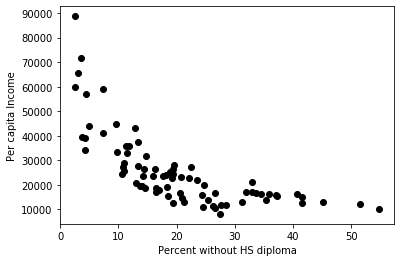

In [44]:
x1 = chicagoDF['percent_aged_25_without_high_school_diploma']
y1 = chicagoDF['per_capita_income_']
plt.plot(x1,y1, 'o', color='black')
plt.xlabel("Percent without HS diploma")
plt.ylabel("Per capita Income");

The visualization reveals that the relationship between these variables is not linear -- rather than a constant change of -293/1, the decrease in HS diploma recipients falls more steeply from maximum PC income until around 30,000 dollars, and then tapers off at a shallower slope after that point. This raises more questions. Perhaps income is the most important predictor for adults aged 25 having or not having a high school diploma, *if* they make 30,000 dollars or more per year, but other factors may become better predictors for high school diploma possession below that value. 